# **Tugas Akhir - DinusBot**


## **Menyiapkan library yang dibutuhkan**



In [1]:
pip install indoNLP #or indonlp -> untuk mengganti slang/singkatan menjadi kata yang lebih formal -> sumber asli bisa liat di kamus alay dari nana

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.6 MB/s eta 0:00:00


In [2]:
pip install nlp-id # untuk stopwords removal dan lematisasi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 17.6 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153892 sha256=81b3efe298856cf2053b812e736a48f5351d13104d50d2be6c0603ac2b6910e2
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ed998ce50d48758f8a973ef40f4389425b886f6782a4795d5c2a0060cc4309ec
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.4
    Uninstalling pytest-7.4.4:
      Successfully uninstalled pytest-7.4.4


In [3]:
# Import Libraries
import json
import nltk
import time
import random
import re
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nlp_id.lemmatizer import Lemmatizer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [4]:
# Package sentence tokenizer
nltk.download('omw-1.4')
# Package lemmatization
nltk.download('punkt')
# Package multilingual wordnet data
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **Load dataset intent.json**

Hal yang perlu dilakukan:
1. Menambah jumlah dataset dari dialog percakapan chatbot

In [5]:
# Impor Dataset
with open('/content/intents.json') as content:
  data1 = json.load(content)

# Mendapatkan Semua Data Ke Dalam List
tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
# ignore_words = ['?', '!']
ignore_words=['?','!','.','“', '”','(', ')', ',','’','/','\\']

for intent in data1['intents']:
  responses[intent['tag']] = intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      # tokenizer = Tokenizer()
      # w = tokenizer.tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi Data ".json" Ke Dalam Dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})
print(words)

['hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan', 'sobat', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang

In [6]:
# Penyematan Kata Dan Lematisasi
words = " ".join([str(word.lower()) for word in words if word not in string.punctuation])
qwerty = words
lemmatizer = Lemmatizer()
words = lemmatizer.lemmatize(words)
words = sorted(list(set(words.split())))
print(len(words), "unique lemmatized words", words)

495 unique lemmatized words ['1', '2', '3', '4', 'absensi', 'account', 'ada', 'adakan', 'adalah', 'administrasi', 'afternoon', 'agar', 'aja', 'aju', 'akademik', 'akan', 'akhir', 'akses', 'aktif', 'aktivasi', 'aktivis', 'akun', 'alamat', 'alumni', 'ambil', 'amil', 'ampu', 'andai', 'anggota', 'antara', 'apa', 'apabila', 'apakah', 'aplikasi', 'atau', 'awal', 'b', 'badan', 'bagai', 'bagaiamana', 'bagaimana', 'bai', 'bakar', 'balas', 'banjir', 'bank', 'bantu', 'banyak', 'barang', 'baru', 'batas', 'bawa', 'bayar', 'baznas', 'bbp-ppa', 'bca', 'beasiswa', 'beban', 'beda', 'begitu', 'belum', 'benar', 'benefit', 'bentuk', 'berapa', 'beri', 'berita', 'berkas', 'bfi', 'biasa', 'biaya', 'bidikmisi', 'biku', 'bila', 'biro', 'bisa', 'bkd', 'bkm', 'boleh', 'bri', 'bro', 'buah', 'buat', 'budaya', 'buka', 'bukan', 'bukti', 'buku', 'bulan', 'bye', 'byee', 'c', 'call', 'cantum', 'cara', 'career', 'cendekia', 'center', 'cerita', 'cflt', 'class', 'covid-19', 'cuti', 'd', 'dadah', 'daftar', 'dah', 'dalam', '

In [7]:
# Menampilkan Data
data[30:50]

,patterns,tags
30,Dimana Mahasiswa dapat melihat Daftar Nilai ?,daftar_nilai1
31,Bagaimana Cara mengambil Daftar Nilai ?,daftar_nilai2
32,Dimana Saya dapat mengambil Daftar Nilai ?,daftar_nilai3
33,Apabila nilai mata kuliah Saya dari Dosen B ak...,daftar_nilai4
34,Bagaimana mekanisme menghapus nilai / mata kul...,daftar_nilai5
35,Apa yang dimaksud dengan Heregristrasi ?,heregristrasi1
36,Apa beda dari Heregristrasi dengan Registrasi ?,heregristrasi2
37,Kapan heregristrasi dilaksanakan ?,heregristrasi3
38,Kemana Saya harus mengurus heregristrasi ?,heregristrasi4
39,Apa saja persyaratan heregristrasi ?,heregristrasi5


In [8]:
# Analisis dataset - ketahui jumlah tag terbanyak

def get_tags(x):
  x['tags'] = x['tags'].apply(lambda x: re.sub(r"\d+", "", x))
  x = x.drop_duplicates(subset=['tags'], keep="first")
  return [i for i in x['tags']]

def count_tag(x):
  jumlah_tag = {}
  # Buat list kata yang ingin dihitung
  list_of_tag = get_tags(x)
  # Hitung jumlah kemunculan setiap kata
  for tag in list_of_tag:
    jumlah_tag[tag] = df_tag['tags'].str.contains(tag).sum()
  # Kembalikan hasil
  return jumlah_tag

df_tag = pd.DataFrame(data['tags'])
jumlah_tag = count_tag(df_tag)

In [9]:
# Menampilkan banyaknya jumlah tag

keys = list(jumlah_tag.keys())
values = list(jumlah_tag.values())
values = [int(x) for x in values]

df_tags = pd.DataFrame({"tag": keys, "jumlah": values})
df_tags[30:50]

,tag,jumlah
30,unit_kegiatan_mahasiswa,8
31,beban_kinerja_dosen,3
32,informasi_dosen,1
33,pelayanan_biku,4
34,pembayaran_virtual_account,3
35,rekening_pembayaran,1
36,status_pembayaran,5
37,tagihan,8
38,fakultas_ilmu_budaya,1
39,fakultas_ilmu_komputer,1


## **Preproses data**

In [10]:
# Menghilangkan Punktuasi
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data[30:50]

,patterns,tags
30,dimana mahasiswa dapat melihat daftar nilai,daftar_nilai1
31,bagaimana cara mengambil daftar nilai,daftar_nilai2
32,dimana saya dapat mengambil daftar nilai,daftar_nilai3
33,apabila nilai mata kuliah saya dari dosen b ak...,daftar_nilai4
34,bagaimana mekanisme menghapus nilai mata kuli...,daftar_nilai5
35,apa yang dimaksud dengan heregristrasi,heregristrasi1
36,apa beda dari heregristrasi dengan registrasi,heregristrasi2
37,kapan heregristrasi dilaksanakan,heregristrasi3
38,kemana saya harus mengurus heregristrasi,heregristrasi4
39,apa saja persyaratan heregristrasi,heregristrasi5


In [11]:
# Lematisasi Pattern
data['patterns'] = data['patterns'].apply(lambda wrd:[lemmatizer.lemmatize(wrd)])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))
data[30:50]

,patterns,tags
30,mana mahasiswa dapat lihat daftar nilai,daftar_nilai1
31,bagaimana cara ambil daftar nilai,daftar_nilai2
32,mana saya dapat ambil daftar nilai,daftar_nilai3
33,apabila nilai mata kuliah saya dari dosen b ak...,daftar_nilai4
34,bagaimana mekanisme hapus nilai mata kuliah pa...,daftar_nilai5
35,apa yang maksud dengan heregristrasi,heregristrasi1
36,apa beda dari heregristrasi dengan registrasi,heregristrasi2
37,kapan heregristrasi laksana,heregristrasi3
38,mana saya harus urus heregristrasi,heregristrasi4
39,apa saja syarat heregristrasi,heregristrasi5


In [12]:
# Menyortir data kelas tag
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

317 classes ['absensi1', 'absensi2', 'absensi3', 'absensi4', 'beasiswa1', 'beasiswa10', 'beasiswa11', 'beasiswa12', 'beasiswa13', 'beasiswa14', 'beasiswa15', 'beasiswa16', 'beasiswa17', 'beasiswa18', 'beasiswa19', 'beasiswa2', 'beasiswa20', 'beasiswa21', 'beasiswa22', 'beasiswa3', 'beasiswa4', 'beasiswa5', 'beasiswa6', 'beasiswa7', 'beasiswa8', 'beasiswa9', 'beban_kinerja_dosen1', 'beban_kinerja_dosen2', 'beban_kinerja_dosen3', 'berita1', 'berita2', 'biro_kemahasiswaan1', 'call_center1', 'call_center10', 'call_center11', 'call_center12', 'call_center13', 'call_center14', 'call_center15', 'call_center16', 'call_center17', 'call_center18', 'call_center2', 'call_center3', 'call_center4', 'call_center5', 'call_center6', 'call_center7', 'call_center8', 'call_center9', 'career_center_udinus1', 'career_center_udinus10', 'career_center_udinus2', 'career_center_udinus3', 'career_center_udinus4', 'career_center_udinus5', 'career_center_udinus6', 'career_center_udinus7', 'career_center_udinus8', 

In [13]:
# Mencetak jumlah keseluruhan data teks
# documents = kombinasi antara patterns and intents
print (len(documents), "documents")

676 documents


In [14]:
# Tokenisasi Data dengan tensorflow
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[253],
 [254],
 [255],
 [256],
 [257],
 [258],
 [259],
 [260],
 [261],
 [262],
 [263],
 [264],
 [265],
 [266],
 [267],
 [268],
 [269],
 [270],
 [169],
 [271],
 [272, 169],
 [273, 274],
 [170, 275],
 [276],
 [277, 171],
 [278],
 [279, 171],
 [172, 173],
 [280],
 [172, 173, 281],
 [5, 10, 6, 43, 15, 61],
 [2, 18, 25, 15, 61],
 [5, 9, 6, 25, 15, 61],
 [47,
  61,
  64,
  35,
  9,
  48,
  44,
  282,
  174,
  65,
  4,
  102,
  15,
  61,
  131,
  283,
  175,
  11,
  284],
 [2, 66, 285, 61, 64, 35, 39, 15, 61],
 [1, 3, 85, 53, 86],
 [1, 286, 48, 86, 53, 87],
 [40, 86, 41],
 [5, 9, 26, 176, 86],
 [1, 12, 14, 86],
 [5, 19, 6, 20],
 [2, 18, 19, 49, 1, 12, 3, 26, 9, 20],
 [47, 13, 132, 50, 287, 88, 10, 2],
 [1, 3, 85, 53, 54],
 [40, 54, 177],
 [2, 288, 54, 9, 89],
 [1, 3, 85, 53, 90, 54],
 [2, 66, 289, 54],
 [2, 47, 54, 290, 291, 292, 293, 103, 294],
 [2, 7, 104, 6, 54, 49, 27, 25, 54],
 [2, 7, 105, 25, 54, 65, 178],
 [5, 9, 11, 43, 37, 91, 3, 295],
 [40, 38, 28, 4, 133],
 [5, 10, 11, 43, 106, 38

In [15]:
# Menerapkan padding
X_train = pad_sequences(train)
print(X_train) # Padding Sequences

[[  0   0   0 ...   0   0 253]
 [  0   0   0 ...   0   0 254]
 [  0   0   0 ...   0   0 255]
 ...
 [  0   0   0 ...  81  82  83]
 [  0   0   0 ...  81  82  83]
 [  0   0   0 ...  81  82  83]]


In [16]:
# Encoding output
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[ 81  81  81  81  81  81  81  81  81  81  81  81  81  81  81  81  80  80
  80  80  80  80  80  80  80 278 278 278 278 278  60  61  62  63  64  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97 100 107 117
 118 119 120 121 122 123 124 108 109 110 111 112 113 114 115 116 125 126
 127 128 216 217 218 227 228 229 230 231 232 233 235 243 244 245 246 247
 248 249 250 236 237 238 239 240 241 242 251 252 253  65  66 219 220 279
 280 281 282  50  52  53  54  55  56  57  58  59  51  98  69  70  71  72
  73  74  75 177 178 179 180 181  32  42  43  44  45  46  47  48  49  33
  34  35  36  37  38  39  40  41 254 255 256   4  15  19  20  21  22  23
  24  25   5   6   7   8   9  10  11  12  13  14  16  17  18  31 106 145
 146 147 148 149 150 182 183 184 185 186 187 188 208 209 210 211 305 306
 307 308 309 310 311 312  26  27  28  99 192 193 194 195 196 197 198 234
 257 258 259 260 261 265 266 267 268 269 270 271 272  76  77  78  79 138
 139 140 141 142 101 102 103 104 105 212 213 214 21

# **Input Length, Output Length and Vocabulary**

In [17]:
# input length
input_shape = X_train.shape[1]
print(input_shape)

20


In [18]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

number of unique words :  498


In [19]:
# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

output length:  317


## **Save Model Words & Classes**

In [20]:
pickle.dump(words, open('/content/Model/words.pkl','wb'))
pickle.dump(classes, open('/content/Model/classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [21]:
pickle.dump(le, open('labelencoder.pkl','wb'))
pickle.dump(tokenizer, open('tokenizers.pkl','wb'))

## **Membangun model dengan Neural Network**

In [22]:
# Membuat Modeling
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,20)(i) # Layer Embedding
x = LSTM(20, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Kompilasi Model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

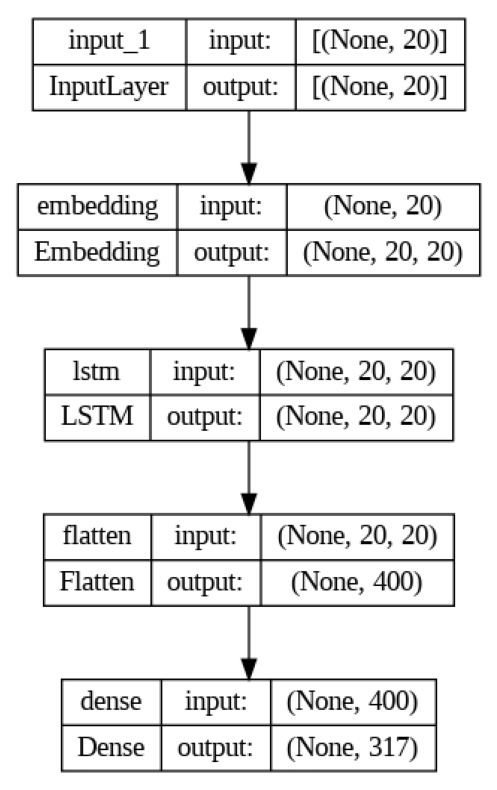

In [23]:
# Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Tampilkan plot model
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
# Menampilkan Parameter Model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 20)            9980      
                                                                 
 lstm (LSTM)                 (None, 20, 20)            3280      
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 317)               127117    
                                                                 
Total params: 140377 (548.35 KB)
Trainable params: 140377 (548.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Training the model (Latih model data sampai n kali)
train = model.fit(X_train, y_train, epochs=305)

Epoch 1/305
11/11 [==============================] - 6s 268ms/step - loss: 5.7658 - accuracy: 0.0029
Epoch 2/305
11/11 [==============================] - 3s 232ms/step - loss: 5.7514 - accuracy: 0.0320
Epoch 3/305
11/11 [==============================] - 3s 255ms/step - loss: 5.7413 - accuracy: 0.0320
Epoch 4/305
11/11 [==============================] - 0s 12ms/step - loss: 5.7192 - accuracy: 0.0291
Epoch 5/305
11/11 [==============================] - 2s 155ms/step - loss: 5.6640 - accuracy: 0.0465
Epoch 6/305
11/11 [==============================] - 0s 42ms/step - loss: 5.5958 - accuracy: 0.0494
Epoch 7/305
11/11 [==============================] - 1s 146ms/step - loss: 5.5223 - accuracy: 0.0552
Epoch 8/305
11/11 [==============================] - 0s 8ms/step - loss: 5.4569 - accuracy: 0.0581
Epoch 9/305
11/11 [==============================] - 1s 132ms/step - loss: 5.3730 - accuracy: 0.0640
Epoch 10/305
11/11 [==============================] - 0s 36ms/step - loss: 5.2746 - accuracy: 0

## **Model Analysis**

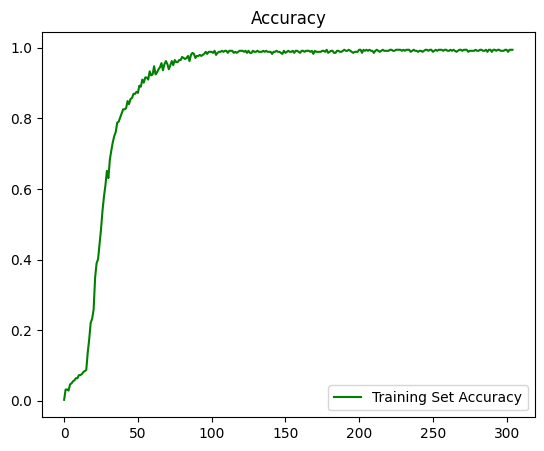

In [26]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy', color='green')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Menyimpan grafik sebagai file PNG
plt.savefig('grafik_accuracy.png', bbox_inches='tight')
plt.show()

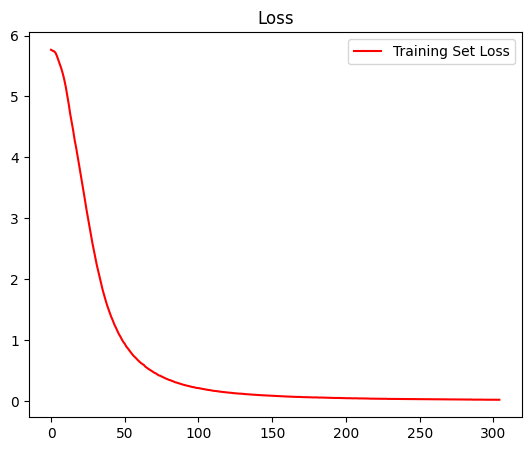

In [27]:
# Plot Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss', color='red')
plt.legend(loc='upper right')
plt.title('Loss')

# Menyimpan grafik sebagai file PNG
plt.savefig('grafik_loss.png', bbox_inches='tight')
plt.show()

In [28]:
# Membuat prediksi dengan model yang telah dilatih
y_pred = model.predict(X_train)
y_pred = y_pred.argmax(axis=1)

# Menghitung Nilai Akurasi
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

11/11 [==============================] - 0s 3ms/step
Accuracy: 0.9941860465116279


## **Pengujian**

In [30]:
# Menentukan batas probabilitas
batas_probabilitas = 0.8

# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('‍ Kamu : ')

  # Preprocessing teks
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  prediction_input = lemmatizer.lemmatize(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  # Mendapatkan hasil keluaran pada model
  output = model.predict(prediction_input)
  output_probabilitas = round(output.max(), 2)
  output = output.argmax()

  # Memeriksa probabilitas
  if output_probabilitas < batas_probabilitas:
    print(" Dinusbot : Maaf, saya tidak mengerti pertanyaan anda.")
  else:
    # Menemukan respon sesuai data tag dan memainkan voice bot
    response_tag = le.inverse_transform([output])[0]
    print(" Dinusbot : ", random.choice(responses[response_tag]))

  time.sleep(0.08)
  print("="*60 + "\n")

  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break


‍ Kamu : hai
1/1 [==============================] - 0s 31ms/step
 Dinusbot :  Hai! Dinusbot hadir untukmu di sini. Informasi apa yang ingin kamu tau?

‍ Kamu : seperti apa sejarah universitas dian nuswantoro?
1/1 [==============================] - 0s 38ms/step
 Dinusbot :  Pada tahun 1986, didirikan sebuah lembaga kursus komputer IMKA yang berlokasi di kota Semarang. Karena kegigihannya dalam membuka dan menciptakan peluang pasar serta ketahanannya dalam menghadapi pelbagai rintangan, IMKA berhasil tumbuh dan berkembang serta menyebar ke beberapa kota besar di Pulau Jawa, seperti Semarang, Surakarta, Yogyakarta, Surabaya, Bandung dan Jakarta. Selengkapnya seputar sejarah UDINUS di https://dinus.ac.id/about/52/history-dinus

‍ Kamu : bagaimana jika ingin menghubungi CFLT udinus?
1/1 [==============================] - 0s 17ms/step
 Dinusbot :  Silahkan menghubungi kontak berikut 081215000472

‍ Kamu : jika nomor yang digunakan mahasiswa untuk sms itu baru, apakah harus mendaftarkan kemba

In [31]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('/content/Model/chat_model.h5')

print('Model Created Successfully!')

Model Created Successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Kesimpulan**
Setelah melakukan proses training dengan model LSTM, didapatkan hasil yang memuaskan, dengan hasil nilai accuracy sebesar 0,9476743936538696 dan loss sebesar 0,2760658860206604 pada epoch terakhir dari proses training dengan jumlah epochs pada training sebanyak 305. Untuk rata-rata nilai accuracy dan loss dari keseluruhan epoch dalam proses training, masing - masing didapatkan nilai sebesar 0.7402306527510041 dan 1,6486162488577796.

In [32]:
import pickle
from tensorflow import keras

# Menentukan batas probabilitas
batas_probabilitas = 0.8

# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('‍ Kamu : ')

  # Preprocessing teks
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  prediction_input = lemmatizer.lemmatize(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  tok = pickle.load(open('/content/tokenizers.pkl', 'rb'))
  prediction_input = tok.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  # Mendapatkan hasil keluaran pada model
  mdl = keras.models.load_model('/content/Model/chat_model.h5')
  lele = pickle.load(open('/content/labelencoder.pkl', 'rb'))
  output = mdl.predict(prediction_input)
  output_probabilitas = round(output.max(), 2)
  output = output.argmax()

  # Memeriksa probabilitas
  if output_probabilitas < batas_probabilitas:
    print(" Dinusbot : Maaf, saya tidak mengerti pertanyaan anda.")
  else:
    # Menemukan respon sesuai data tag dan memainkan voice bot
    response_tag = lele.inverse_transform([output])[0]
    print(" Dinusbot : ", random.choice(responses[response_tag]))

  time.sleep(0.08)
  print("="*60 + "\n")

  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break


‍ Kamu : hai
1/1 [==============================] - 0s 323ms/step
 Dinusbot :  Hei sobat! Ini Dinusbot. Lagi kepo apa nih?

‍ Kamu : terima kasih
1/1 [==============================] - 0s 317ms/step
 Dinusbot :  Dengan senang hati:)

‍ Kamu : sampai jumpa
1/1 [==============================] - 0s 470ms/step
 Dinusbot :  Sampai jumpa lagi!

